In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('trip.csv', error_bad_lines=False)
df.head()

b'Skipping line 50794: expected 12 fields, saw 20\n'


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [3]:
df.isnull().sum()

trip_id                   0
starttime                 0
stoptime                  0
bikeid                    0
tripduration              0
from_station_name         0
to_station_name           0
from_station_id           0
to_station_id             0
usertype                  0
gender               105300
birthyear            105304
dtype: int64

In [4]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [6]:
df.describe()

,trip_id,tripduration,birthyear
count,286857.000000,286857.000000,181553.000000
mean,112431.968012,1178.295675,1979.759062
std,76565.154943,2038.458947,10.167119
min,431.000000,60.008000,1931.000000
25%,43051.000000,387.924000,1974.000000
50%,103487.000000,624.842000,1983.000000
75%,179545.000000,1118.466000,1987.000000
max,255245.000000,28794.398000,1999.000000


In [7]:
df.drop(['gender', 'birthyear'],axis=1,inplace=True)

In [8]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype'],
      dtype='object')

In [9]:
for col in df.columns:
    print(f"Col: {col} Unique count: {df[col].nunique()}")

Col: trip_id Unique count: 236065
Col: starttime Unique count: 176216
Col: stoptime Unique count: 169285
Col: bikeid Unique count: 493
Col: tripduration Unique count: 218883
Col: from_station_name Unique count: 61
Col: to_station_name Unique count: 61
Col: from_station_id Unique count: 61
Col: to_station_id Unique count: 61
Col: usertype Unique count: 2


In [10]:
df['usertype']

0                         Member
1                         Member
2                         Member
3                         Member
4                         Member
5                         Member
6                         Member
7                         Member
8                         Member
9                         Member
10                        Member
11                        Member
12                        Member
13                        Member
14                        Member
15                        Member
16                        Member
17                        Member
18                        Member
19                        Member
20                        Member
21                        Member
22                        Member
23                        Member
24                        Member
25                        Member
26                        Member
27                        Member
28                        Member
29                        Member
          

In [11]:
df.drop(['usertype'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 9 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 19.7+ MB


In [13]:
repl=dict()
stn_ids=df['to_station_id'].unique()
for i in range (len(stn_ids)):
    repl[stn_ids[i]]=i

In [14]:
repl

{'PS-04': 0,
 'PS-05': 1,
 'CBD-07': 2,
 'CBD-05': 3,
 'CBD-06': 4,
 'ID-04': 5,
 'CH-07': 6,
 'WF-04': 7,
 'SLU-15': 8,
 'CBD-13': 9,
 'CH-08': 10,
 'EL-01': 11,
 'DPD-03': 12,
 'BT-01': 13,
 'WF-01': 14,
 'BT-03': 15,
 'UD-04': 16,
 'CBD-03': 17,
 'UW-07': 18,
 'UD-01': 19,
 'BT-05': 20,
 'BT-04': 21,
 'DPD-01': 22,
 'SLU-18': 23,
 'UD-02': 24,
 'FH-01': 25,
 'CH-02': 26,
 'UW-10': 27,
 'SLU-19': 28,
 'SLU-01': 29,
 'CH-09': 30,
 'CH-15': 31,
 'CH-05': 32,
 'UW-01': 33,
 'UW-02': 34,
 'SLU-07': 35,
 'SLU-17': 36,
 'UW-04': 37,
 'UD-07': 38,
 'SLU-04': 39,
 'EL-05': 40,
 'SLU-02': 41,
 'SLU-16': 42,
 'FH-04': 43,
 'CH-06': 44,
 'CH-03': 45,
 'CH-01': 46,
 'CH-12': 47,
 'EL-03': 48,
 'UW-06': 49,
 'Pronto shop': 50,
 'CD-01': 51,
 'SLU-20': 52,
 'CBD-04': 53,
 'SLU-21': 54,
 'UW-11': 55,
 'Pronto shop 2': 56,
 'CH-16': 57,
 'SLU-22': 58,
 'WF-03': 59,
 '8D OPS 02': 60}

In [23]:
df.replace({"from_station_id": repl},inplace=True)


In [22]:
df.replace({"to_station_id": repl},inplace=True)

In [24]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0


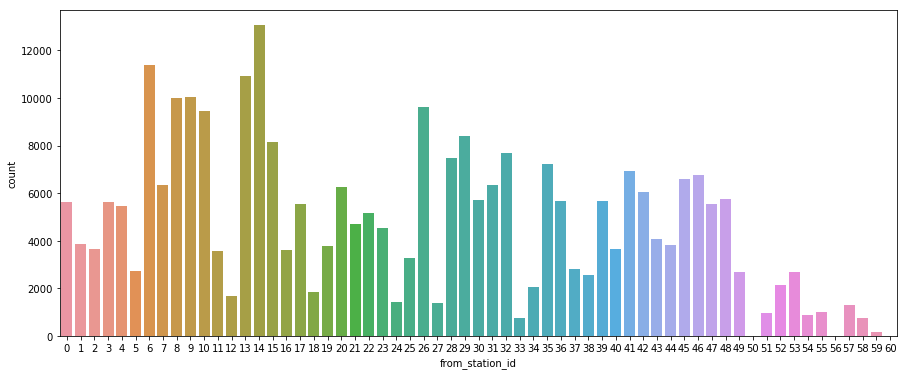

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(df['from_station_id'],label="From")
plt.show()

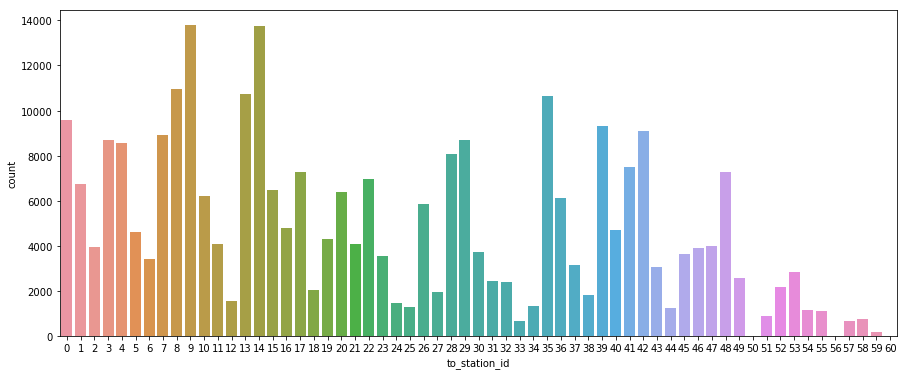

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(df['to_station_id'],label="To")
plt.show()

In [46]:
df['starttime']=pd.to_datetime(df['starttime'])
df['stoptime']=pd.to_datetime(df['stoptime'])

In [49]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0


In [78]:
# df['starttime'][0].dayofweek # Monday=0, Sunday=6
# df['starttime'][0].month 
# df['starttime'][0].day 
# df['starttime'][0].hour 
# df['starttime'][0].minute 
# df['starttime'][0].second 


In [79]:
day_of_week=[]
for x in df['starttime']:
    day_of_week.append(x.dayofweek)
len(df['starttime']),len(day_of_week)

(286857, 286857)

In [76]:
df['day_of_week']=day_of_week

In [77]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,day_of_week
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0,0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0,0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0,0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0,0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,4,0,0


In [82]:
hour=[]
for x in df['starttime']:
    hour.append(x.hour)
len(hour),len(df['starttime'])

(286857, 286857)

In [83]:
df['hour']=hour

In [85]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'day_of_week', 'hour'],
      dtype='object')

In [86]:
df=df[['trip_id','from_station_id','to_station_id','day_of_week', 'hour']].copy()

In [87]:
df.head()

,trip_id,from_station_id,to_station_id,day_of_week,hour
0,431,4,0,0,10
1,432,4,0,0,10
2,433,4,0,0,10
3,434,4,0,0,10
4,435,4,0,0,10


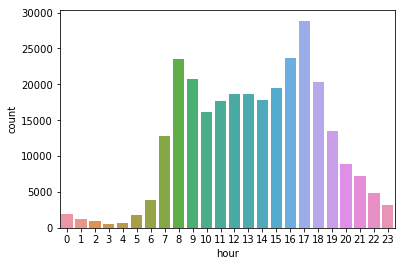

In [89]:
sns.countplot(df['hour'],label="hour")
plt.show()

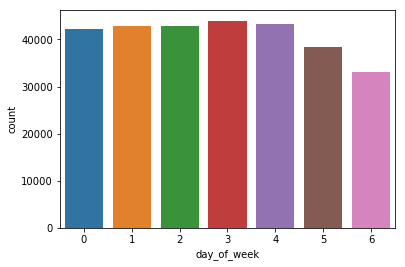

In [90]:
sns.countplot(df['day_of_week'],label="dayofweek")
plt.show()

In [88]:
df.to_csv("new_trips.csv")